# SuperKart Sales Prediction

## Context:
A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective:
SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

## Data Description:
The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

| Feature                   | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| **Product_Id**               | Unique identifier of each product, consisting of two letters followed by a number. |
| **Product_Weight**           | The weight of each product.                                                 |
| **Product_Sugar_Content**    | Sugar content of each product (low sugar, regular, no sugar).                |
| **Product_Allocated_Area**   | Ratio of the allocated display area of each product to the total display area of all products in a store. |
| **Product_Type**             | Broad category for each product (meat, snack foods, dairy, etc.).            |
| **Product_MRP**              | Maximum retail price of each product.                                        |
| **Store_Id**                 | Unique identifier of each store.                                             |
| **Store_Establishment_Year** | The year in which the store was established.                                 |
| **Store_Size**               | Size of the store (high, medium, low).                                       |
| **Store_Location_City_Type** | Type of city in which the store is located (Tier 1, Tier 2, Tier 3).         |
| **Store_Type**               | Type of store based on the products sold (Departmental Store, Supermarket Type 1, etc.). |
| **Product_Store_Sales_Total**| Total revenue generated by the sale of a product in a specific store.        |


In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import necessary libraries and packages
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns
import pylab

In [ ]:
# Load the dataset
df= pd.read_csv('/content/drive/MyDrive/SuperKart.csv')

# View the dataset
df.head(10)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36
5,FD5680,12.03,Low Sugar,0.053,Snack Foods,113.64,OUT004,2009,Medium,Tier 2,Supermarket Type2,2629.15
6,FD5484,16.35,Low Sugar,0.112,Meat,185.71,OUT003,1999,Medium,Tier 1,Departmental Store,5081.14
7,NC5885,12.94,No Sugar,0.286,Household,194.75,OUT003,1999,Medium,Tier 1,Departmental Store,4494.62
8,FD1961,9.45,Low Sugar,0.047,Snack Foods,95.95,OUT002,1998,Small,Tier 3,Food Mart,1684.82
9,NC6657,8.94,No Sugar,0.045,Health and Hygiene,143.01,OUT004,2009,Medium,Tier 2,Supermarket Type2,2531.30


In [ ]:
# Explore the dataset
print('The shape of the dataset is:', df.shape)
print('The columns in the dataset are:\n', df.columns)

The shape of the dataset is: (8763, 12)
The columns in the dataset are:
 Index(['Product_Id', 'Product_Weight', 'Product_Sugar_Content',
       'Product_Allocated_Area', 'Product_Type', 'Product_MRP', 'Store_Id',
       'Store_Establishment_Year', 'Store_Size', 'Store_Location_City_Type',
       'Store_Type', 'Product_Store_Sales_Total'],
      dtype='object')


In [ ]:
# View the data types
df.dtypes

,0
Product_Id,object
Product_Weight,float64
Product_Sugar_Content,object
Product_Allocated_Area,float64
Product_Type,object
Product_MRP,float64
Store_Id,object
Store_Establishment_Year,int64
Store_Size,object
Store_Location_City_Type,object


In [ ]:
# Dataset summary statistics
df.describe(include= 'all')

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
count,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763,8763,8763.000000
unique,8763,NaN,4,NaN,16,NaN,4,NaN,3,3,4,NaN
top,FD6114,NaN,Low Sugar,NaN,Fruits and Vegetables,NaN,OUT004,NaN,Medium,Tier 2,Supermarket Type2,NaN
freq,1,NaN,4885,NaN,1249,NaN,4676,NaN,6025,6262,4676,NaN
mean,NaN,12.653792,NaN,0.068786,NaN,147.032539,NaN,2002.032751,NaN,NaN,NaN,3464.003640
std,NaN,2.217320,NaN,0.048204,NaN,30.694110,NaN,8.388381,NaN,NaN,NaN,1065.630494
min,NaN,4.000000,NaN,0.004000,NaN,31.000000,NaN,1987.000000,NaN,NaN,NaN,33.000000
25%,NaN,11.150000,NaN,0.031000,NaN,126.160000,NaN,1998.000000,NaN,NaN,NaN,2761.715000
50%,NaN,12.660000,NaN,0.056000,NaN,146.740000,NaN,2009.000000,NaN,NaN,NaN,3452.340000
75%,NaN,14.180000,NaN,0.096000,NaN,167.585000,NaN,2009.000000,NaN,NaN,NaN,4145.165000


### **Summary Statistics Analysis**

The provided summary statistics reveal key insights into the dataset's distribution and features that can influence the sales prediction objective.

For `Product_Weight`, the mean is 12.65 kg with a standard deviation of 2.22 kg, ranging from 4.00 kg to 22.00 kg. This suggests that product weights are relatively consistent, which might impact sales depending on the product type.

Regarding `Product_Sugar_Content`, there are four unique values, with "Low Sugar" being the most frequent (4885 occurrences), indicating a consumer preference or marketing focus on health-conscious products.

`Product_Allocated_Area` has a mean of 0.0688, with a range from 0.004 to 0.298, suggesting variability in display allocation, which could influence product visibility and sales.

The `Product_MRP` ranges from 31.00 to 266.00, with a mean of 147.03, indicating a broad price range that can impact purchasing decisions.

The `Store_Establishment_Year` spans from 1987 to 2009, showing a mix of old and new stores that may affect sales performance.

Lastly, the `Product_Store_Sales_Total` ranges from 33.00 to 8000.00, with a mean of 3464.00, highlighting significant variability in sales across products and stores.


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


In [ ]:
# Checking features
df['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2251
No Sugar,1519
reg,108




*   Since `reg` is the same as the `Regular` in the `Product_Sugar_Content` feature, I will proceed to handle this minor issue by adding `reg` to `Regular` in the next step.



In [ ]:
# Handle 'Product_Sugar_Content' column
df['Product_Sugar_Content']= df['Product_Sugar_Content'].replace('reg', 'Regular')

# Verify changes
df['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


In [ ]:
# Cluster products based on their category prefix
df['Product_Id']= df['Product_Id'].str[:2]

# Verify 'Product_Id' changes
df.sample(10)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
7705,NC,12.45,No Sugar,0.046,Health and Hygiene,164.01,OUT004,2009,Medium,Tier 2,Supermarket Type2,3755.52
5057,FD,11.55,Low Sugar,0.028,Meat,111.89,OUT001,1987,High,Tier 2,Supermarket Type1,2485.64
2371,NC,10.12,No Sugar,0.031,Health and Hygiene,141.35,OUT004,2009,Medium,Tier 2,Supermarket Type2,2765.34
3077,FD,12.84,Low Sugar,0.109,Meat,175.87,OUT001,1987,High,Tier 2,Supermarket Type1,4086.02
1986,FD,10.00,Low Sugar,0.058,Seafood,144.39,OUT004,2009,Medium,Tier 2,Supermarket Type2,2798.66
6222,FD,10.90,Low Sugar,0.151,Dairy,142.18,OUT004,2009,Medium,Tier 2,Supermarket Type2,2956.97
4907,FD,9.52,Low Sugar,0.022,Baking Goods,154.55,OUT004,2009,Medium,Tier 2,Supermarket Type2,2899.65
4148,FD,12.20,Low Sugar,0.084,Fruits and Vegetables,134.65,OUT004,2009,Medium,Tier 2,Supermarket Type2,3097.45
714,NC,14.19,No Sugar,0.088,Health and Hygiene,129.30,OUT004,2009,Medium,Tier 2,Supermarket Type2,3438.26
8484,FD,14.85,Regular,0.013,Dairy,122.66,OUT004,2009,Medium,Tier 2,Supermarket Type2,3450.56


<ipython-input-11-a915ad57357f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= column, showmeans= True, ax= ax[0], palette= palette)
<ipython-input-11-a915ad57357f>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= df, x= column, kde= True, ax= ax[1], palette= palette)


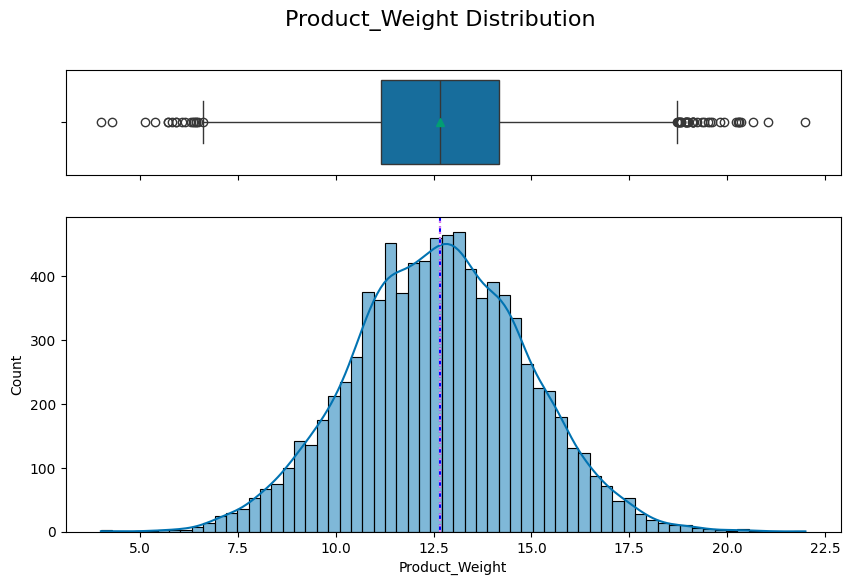

<ipython-input-11-a915ad57357f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= column, showmeans= True, ax= ax[0], palette= palette)
<ipython-input-11-a915ad57357f>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= df, x= column, kde= True, ax= ax[1], palette= palette)


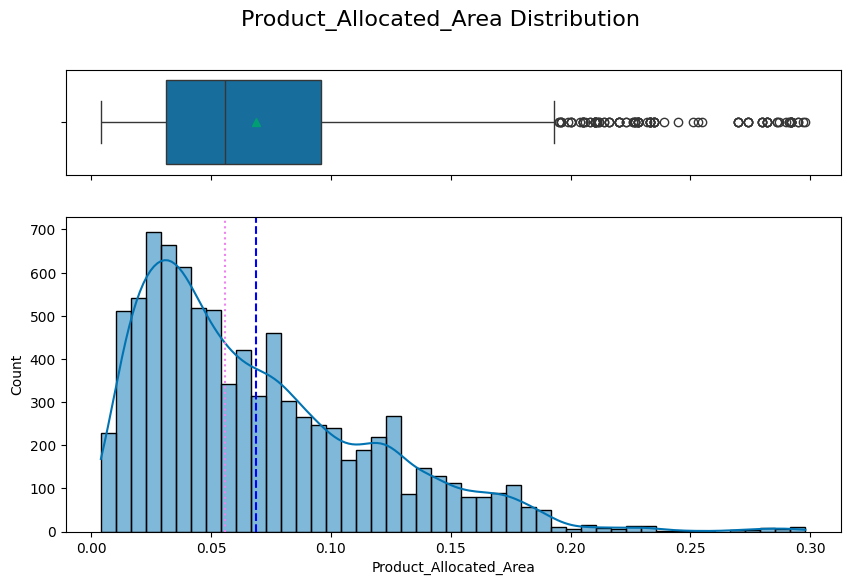

<ipython-input-11-a915ad57357f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= column, showmeans= True, ax= ax[0], palette= palette)
<ipython-input-11-a915ad57357f>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= df, x= column, kde= True, ax= ax[1], palette= palette)


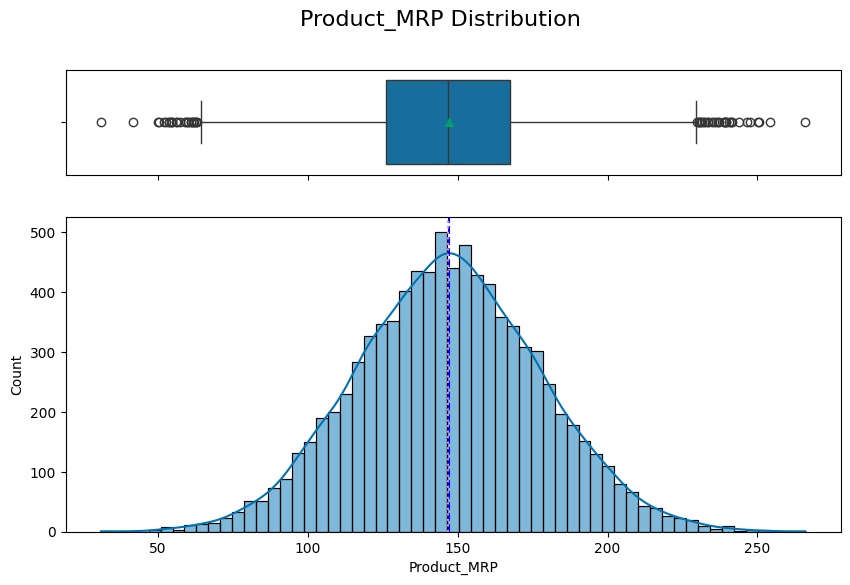

<ipython-input-11-a915ad57357f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= column, showmeans= True, ax= ax[0], palette= palette)
<ipython-input-11-a915ad57357f>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= df, x= column, kde= True, ax= ax[1], palette= palette)


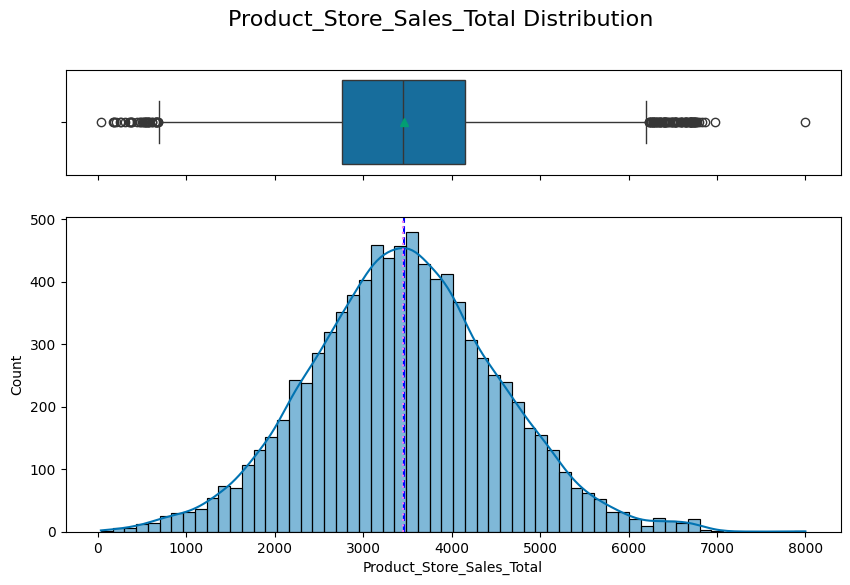

In [ ]:
# Plot numerical columns
def plot_numerical_columns(df, palette= 'colorblind'):

  # Set palette
  sns.set_palette(palette)

  # Identify numerical columns
  numerical_columns= df.select_dtypes(include= ['number']).columns
  numerical_columns= numerical_columns.drop('Store_Establishment_Year')

  for column in numerical_columns:

    # Create subplots
    fig, ax= plt.subplots(2, 1, figsize= (10, 6), gridspec_kw= {'height_ratios': (1, 3)}, sharex= True)

    # Add boxplot
    sns.boxplot(data= df, x= column, showmeans= True, ax= ax[0], palette= palette)

    # Add histogram with KDE
    sns.histplot(data= df, x= column, kde= True, ax= ax[1], palette= palette)
    ax[1].axvline(df[column].mean(), linestyle= '--', color= 'blue')
    ax[1].axvline(df[column].median(), linestyle= ':', color= 'violet')

    # Add title
    fig.suptitle(f'{column} Distribution', fontsize= 16)

    # Show plot
    plt.show()

# Call the function
plot_numerical_columns(df, palette= 'colorblind')

### **Key Insights from the Plots**

#### Product_Store_Sales_Total Distribution
- The **boxplot** shows a significant number of outliers on the higher end of the sales distribution, indicating some stores/products generate exceptionally high sales compared to the median.
- The **histogram** displays a roughly normal distribution with a slight right skew. Most products have sales totals around the mean value (~3464), with a long tail towards higher sales values. The mean and median are close, indicating a relatively symmetrical distribution.

#### Product_MRP Distribution
- The **boxplot** indicates a few outliers on both the lower and higher ends, with most values clustered in the interquartile range.
- The **histogram** shows a normal distribution centered around the mean (~147), with a few products priced significantly lower or higher.

#### Product_Allocated_Area Distribution
- The **boxplot** shows several outliers, particularly on the higher end, indicating some products have a disproportionately large allocated area.
- The **histogram** indicates a right-skewed distribution. Most products have a smaller allocated area, with a few having significantly larger areas.

#### Product_Weight Distribution
- The **boxplot** shows a few outliers on both ends, but most product weights are within a consistent range.
- The **histogram** suggests a normal distribution centered around the mean (~12.65), indicating product weights are relatively evenly distributed around this value.


In [ ]:
# Function to plot categorical features
def plot_categorical_feature(df, feature, palette= 'viridis', figsize=(15, 8)):

    # Define a color palette
    unique_values= df[feature].nunique()
    colors= sns.color_palette(palette, n_colors= unique_values)

    # Create subplots with the given figure size
    fig, axes= plt.subplots(2, 1, figsize= figsize, sharex= True)

    # Countplot
    sns.countplot(data= df, x= feature, palette= colors, ax= axes[0])
    axes[0].set_title(f'Count of Each {feature}')
    axes[0].set_ylabel('Count')

    # Annotate the count values on top of the bars
    for p in axes[0].patches:
        height= p.get_height()
        axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                         ha= 'center', va= 'center', xytext= (0, 5), textcoords= 'offset points')

    # Percentage plot
    total= len(df)
    sns.countplot(data= df, x= feature, palette= colors, ax= axes[1])
    axes[1].set_title(f'Percentage of Each {feature}')
    axes[1].set_ylabel('Percentage')

    # Annotate the percentage values on top of the bars
    for p in axes[1].patches:
        height= p.get_height()
        percentage= f'{100 * height / total:.1f}%'
        axes[1].annotate(f'{percentage}', (p.get_x() + p.get_width() / 2., height),
                         ha= 'center', va= 'center', xytext= (0, 5), textcoords= 'offset points')

    # Set the x-axis labels for both plots and rotate them
    for ax in axes:
        ax.set_xlabel(feature)
        ax.set_ylim(0, ax.get_ylim()[1] * 1.1)  # Add some space above the tallest bar
        plt.sca(ax)
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

<ipython-input-12-7a5c20010f1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[0])
<ipython-input-12-7a5c20010f1c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[1])


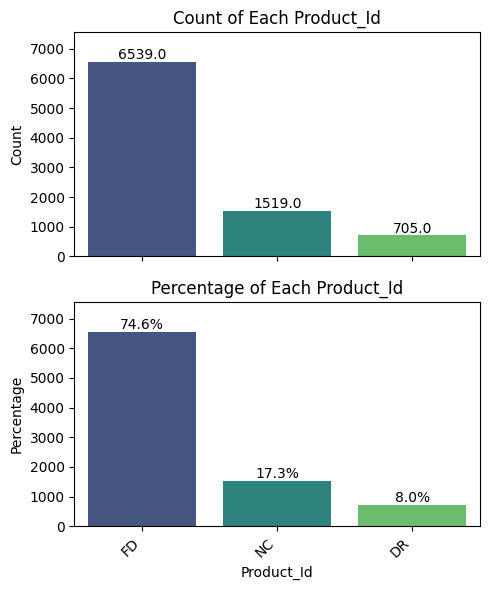

In [ ]:
# Plot 'Product_Id'
plot_categorical_feature(df, 'Product_Id', figsize= (5,6))

<ipython-input-12-7a5c20010f1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[0])
<ipython-input-12-7a5c20010f1c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[1])


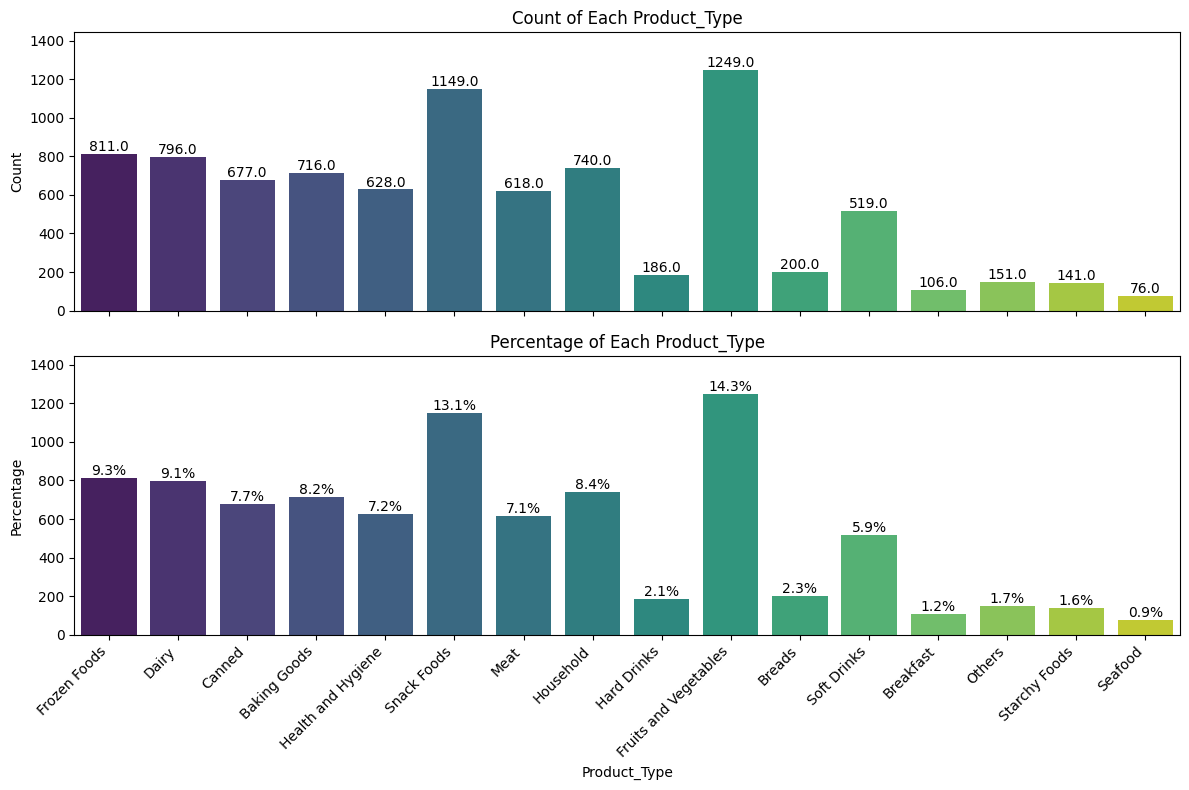

In [ ]:
# Plot 'Product_Type'
plot_categorical_feature(df, 'Product_Type', figsize= (12,8))

<ipython-input-12-7a5c20010f1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[0])
<ipython-input-12-7a5c20010f1c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[1])


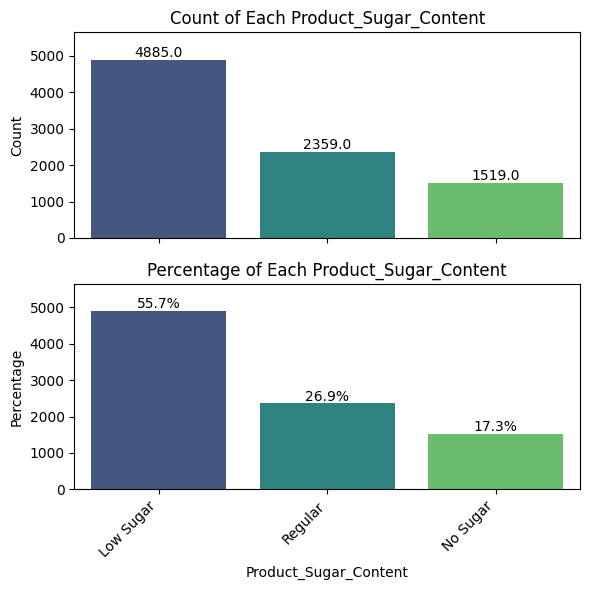

In [ ]:
# Plot 'Product_Sugar_Content'
plot_categorical_feature(df, 'Product_Sugar_Content', figsize= (6,6))

<ipython-input-12-7a5c20010f1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[0])
<ipython-input-12-7a5c20010f1c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[1])


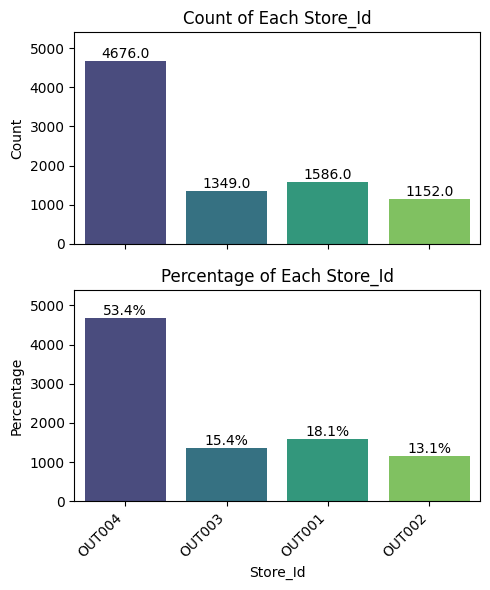

In [ ]:
# Plot 'Store_Id'
plot_categorical_feature(df, 'Store_Id', figsize= (5,6))

<ipython-input-12-7a5c20010f1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[0])
<ipython-input-12-7a5c20010f1c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[1])


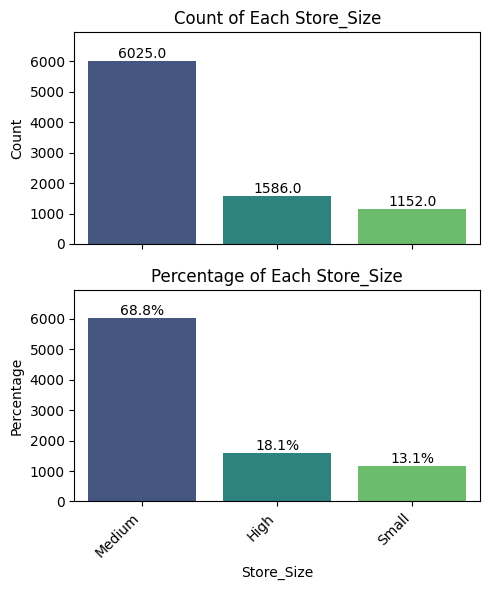

In [ ]:
# Plot 'Store_Size'
plot_categorical_feature(df, 'Store_Size', figsize= (5,6))

<ipython-input-12-7a5c20010f1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[0])
<ipython-input-12-7a5c20010f1c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[1])


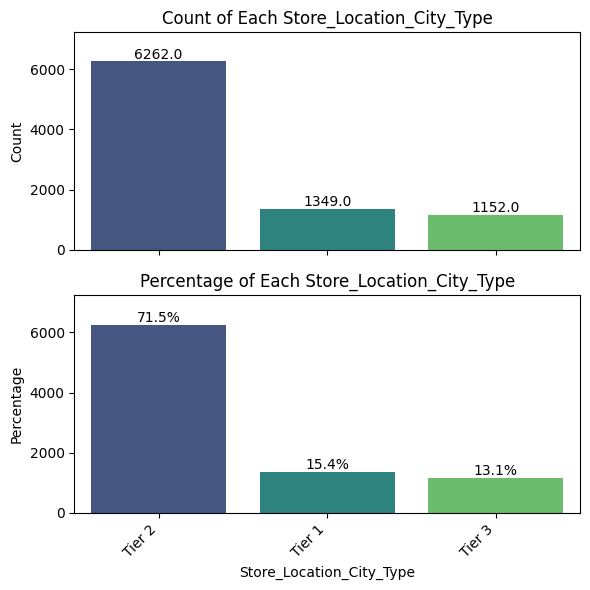

In [ ]:
# Plot 'Store_Location_City_Type'
plot_categorical_feature(df, 'Store_Location_City_Type', figsize= (6,6))

<ipython-input-12-7a5c20010f1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[0])
<ipython-input-12-7a5c20010f1c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= feature, palette= colors, ax= axes[1])


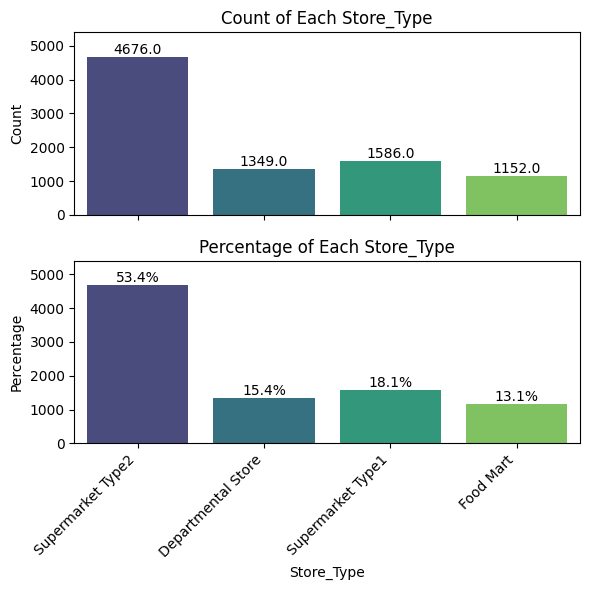

In [ ]:
# Plot 'Store_Type'
plot_categorical_feature(df, 'Store_Type', figsize= (6,6))

### **Analysis of Categorical Features**

#### `Product_Id`
- **FD**: Represents 74.6% of the products, indicating a significant portion of the product catalog.
- **NC**: Accounts for 17.3% of the products.
- **DR**: Makes up 8.0% of the products.
  - This distribution suggests that the majority of products fall under the 'FD' category, which could be a key area of focus for sales strategies.

#### `Product_Sugar_Content`
- **Low Sugar**: Comprises 55.7% of the products.
- **Regular**: Includes 26.9% of the products.
- **No Sugar**: Represents 17.3% of the products.
  - The majority of products are low sugar, indicating a potential market preference or health trend that could influence inventory and marketing decisions.

#### `Product_Type`
- **Fruits and Vegetables**: The largest category, making up 14.3% of the products.
- **Snack Foods**: The second largest category at 13.1%.
- **Other types**: Each of the remaining categories represents less than 10% of the total products, with Seafood being the smallest at 0.9%.
  - The diversity in product types suggests a broad product range, with a focus on fresh produce and snacks, which could impact inventory management and sales strategies.

#### `Store_Id`
- **OUT004**: Dominates with 53.4% of the store entries.
- **OUT003, OUT001, OUT002**: Represent 15.4%, 18.1%, and 13.1% respectively.
  - The concentration in OUT004 suggests it may be the largest or most significant store, warranting tailored sales strategies and inventory planning.

#### `Store_Size`
- **Medium**: Represents 68.8% of the stores.
- **High**: Comprises 18.1% of the stores.
- **Small**: Accounts for 13.1% of the stores.
  - The predominance of medium-sized stores indicates a focus on a certain store size, which could influence supply chain and distribution strategies.

#### `Store_Location_City_Type`
- **Tier 2**: Dominates with 71.5% of the stores.
- **Tier 1**: Accounts for 15.4% of the stores.
- **Tier 3**: Represents 13.1% of the stores.
  - The high proportion of Tier 2 city stores suggests a strategic focus on mid-sized urban areas, which could impact marketing and operational decisions.

#### `Store_Type`
- **Supermarket Type 2**: Represents 53.4% of the stores.
- **Departmental Store**: Includes 15.4% of the stores.
- **Supermarket Type 1**: Comprises 18.1% of the stores.
- **Food Mart**: Accounts for 13.1% of the stores.
  - The focus on Supermarket Type 2 indicates a predominant store format, which could shape the overall business strategy and customer experience initiatives.


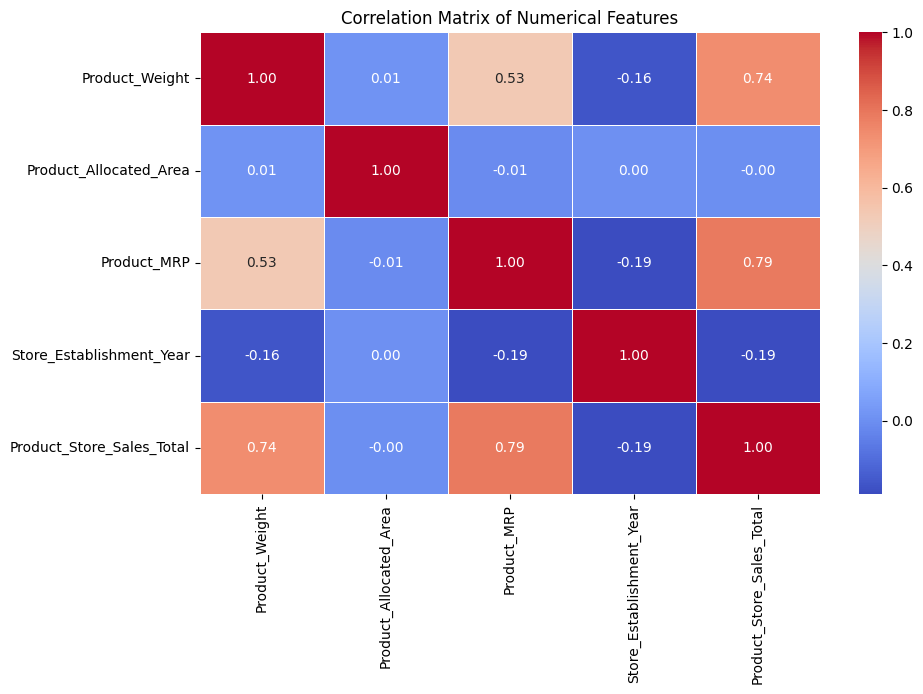

In [ ]:
# Correlation matrix of the numerical features. Select numerical features
numerical_features= df.select_dtypes(include= ['float64', 'int64']).columns

# Calculate the correlation matrix
cm= df[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize= (10,6))
sns.heatmap(cm, annot= True, cmap= 'coolwarm', fmt= '.2f', linewidths= 0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Analysis of Correlation Matrix**

#### Key Insights
1. **Product_Weight**:
   - Strong positive correlation with `Product_Store_Sales_Total` (0.74), indicating that higher product weights are associated with higher total sales.
   - Moderate positive correlation with `Product_MRP` (0.53), suggesting that heavier products tend to have higher maximum retail prices.

2. **Product_Allocated_Area**:
   - Negligible correlations with other variables, indicating that the allocated display area does not significantly impact other numerical features.

3. **Product_MRP**:
   - Strong positive correlation with `Product_Store_Sales_Total` (0.79), showing that products with higher MRPs contribute more to total sales.
   - Moderate positive correlation with `Product_Weight` (0.53), reinforcing the relationship between product weight and retail price.

4. **Store_Establishment_Year**:
   - Weak negative correlations with `Product_Weight` (-0.16), `Product_MRP` (-0.19), and `Product_Store_Sales_Total` (-0.19), suggesting that newer stores tend to have lighter, cheaper, and lower-selling products, but the relationships are not strong.

5. **Product_Store_Sales_Total**:
   - Strong positive correlations with `Product_Weight` (0.74) and `Product_MRP` (0.79), indicating that both higher weights and higher prices are significant contributors to total sales.

#### Summary
The correlation matrix reveals that `Product_Weight` and `Product_MRP` are crucial factors influencing `Product_Store_Sales_Total`. Higher weights and prices are strongly associated with increased total sales. On the other hand, the `Product_Allocated_Area` and `Store_Establishment_Year` show weak or negligible correlations with other features, indicating limited impact on sales and product attributes.


In [ ]:
# Calculating total sales by product ID
df_rev= df.groupby(['Product_Id'])['Product_Store_Sales_Total'].sum().reset_index()
print(df_rev)

  Product_Id  Product_Store_Sales_Total
0         DR                 2422859.34
1         FD                22662260.88
2         NC                 5269943.68


### **Total Sales by Product_Id**

#### Key Insights
- **FD**: Dominates the total sales with \$22,662,260.88, indicating that products in this category are the highest revenue generators.
- **NC**: Contributes \$5,269,943.68 to the total sales, significantly less than FD but still substantial.
- **DR**: Generates \$2,422,859.34 in total sales, making it the lowest among the three categories.

#### Summary
The `FD` category is the most significant contributor to total sales, followed by `NC` and `DR`. This highlights the importance of focusing on `FD` products for maximizing revenue.


<ipython-input-22-fa74a07ba8f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_rev, x= 'Product_Id', y= 'Product_Store_Sales_Total', palette= colors)


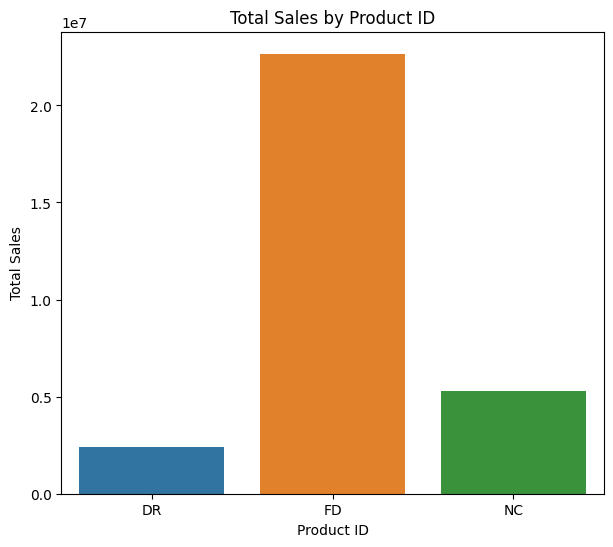

In [ ]:
# Plot 'Product_Id' on the target feature. Define the colors
colors= ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the data
plt.figure(figsize= (7,6))
sns.barplot(data= df_rev, x= 'Product_Id', y= 'Product_Store_Sales_Total', palette= colors)
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product ID')
plt.show()

<ipython-input-23-352f7a04450c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'Product_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)


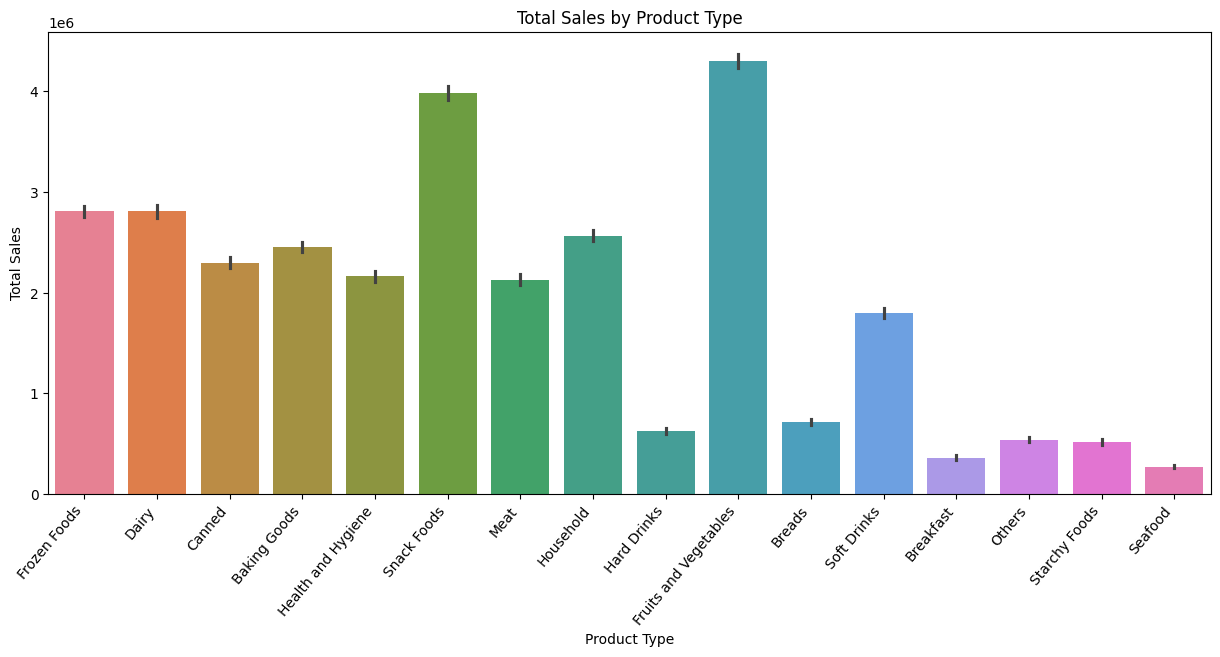

In [ ]:
# Plot 'Product_Type' on the target feature. Define colors
colors= sns.color_palette('husl', df['Product_Type'].nunique())

# Plot the data
plt.figure(figsize= (15,6))
sns.barplot(data=df, x= 'Product_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Type')
plt.xticks(rotation= 50, ha= 'right')
plt.show()

<ipython-input-24-b58a39b29132>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= 'Store_Id', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)


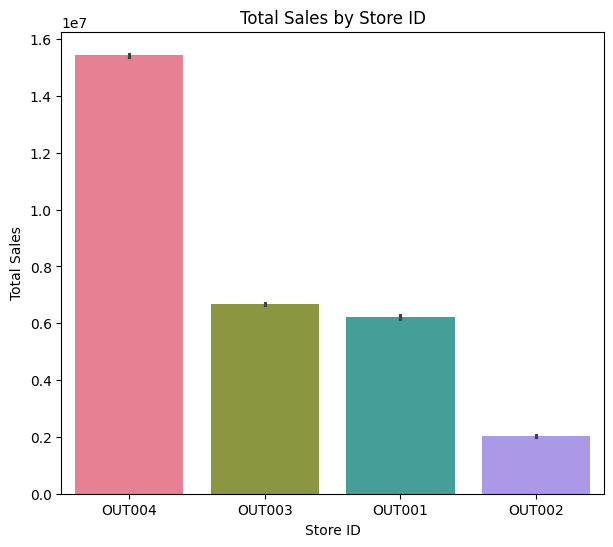

In [ ]:
# Plot 'Store_Id' on the target feature. Define the colors
colors= sns.color_palette('husl', df['Store_Id'].nunique())

# Plot the data
plt.figure(figsize= (7,6))
sns.barplot(data= df, x= 'Store_Id', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store ID')
plt.show()

<ipython-input-25-3d69dcd19a99>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= 'Store_Location_City_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)


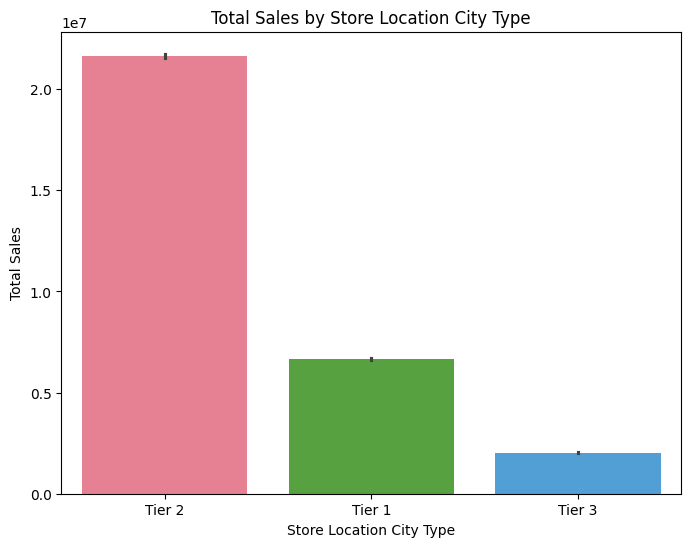

In [ ]:
# Plot 'Store_Location_City_Type' on the target feature. Define the colors
colors= sns.color_palette('husl', df['Store_Location_City_Type'].nunique())

# Plot the data
plt.figure(figsize= (8,6))
sns.barplot(data= df, x= 'Store_Location_City_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Store Location City Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Location City Type')
plt.show()

<ipython-input-26-e8884a350db2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= 'Store_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)


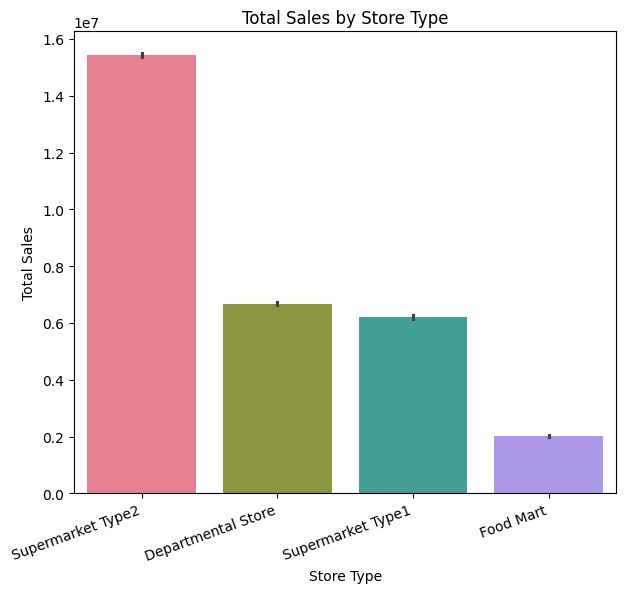

In [ ]:
# Plot 'Store_Type' on the target feature. Define the colors
colors= sns.color_palette('husl', df['Store_Type'].nunique())

# Plot the data
plt.figure(figsize= (7,6))
sns.barplot(data= df, x= 'Store_Type', y= 'Product_Store_Sales_Total', estimator= np.sum, palette= colors)
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Type')
plt.xticks(rotation= 20, ha= 'right')
plt.show()

Text(0.5, 1.0, 'Store Product Sales Analysis')

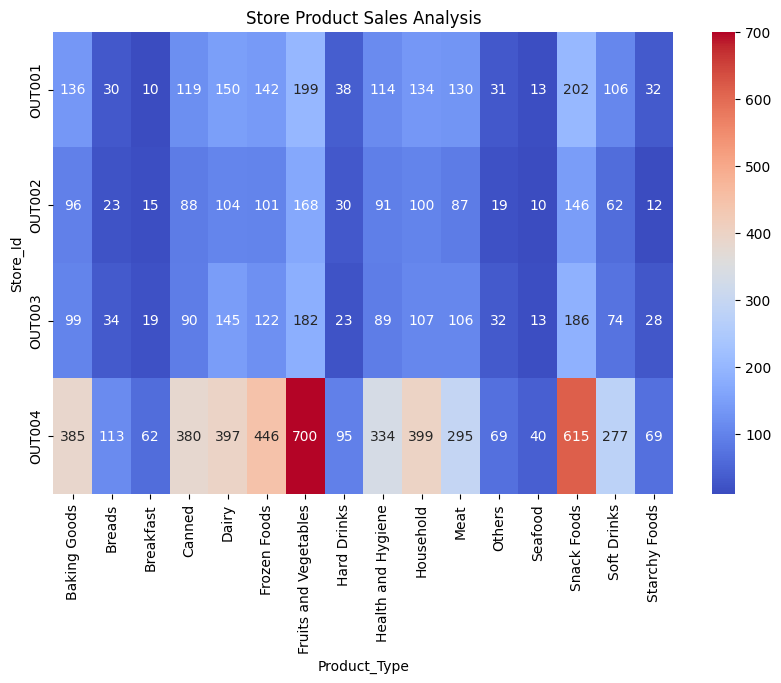

In [ ]:
# Store product analysis
plt.figure(figsize= (10,6))
sns.heatmap(pd.crosstab(df['Store_Id'], df['Product_Type']), annot= True, cmap= 'coolwarm', fmt= 'g')
plt.title('Store Product Sales Analysis')

### **Heatmap Analysis of Store_Id vs Product_Type**

The heatmap visualizes the relationship between different store IDs and product types, highlighting the count of each product type in each store. Key insights from this visualization include:

1. **Store OUT004 Dominance**:
   - Store OUT004 has significantly higher counts across most product types compared to other stores.
   - Notably, Frozen Foods, Fruits and Vegetables, Dairy, and Snack Foods have the highest counts in this store.

2. **Popular Product Types**:
   - Fruits and Vegetables and Frozen Foods are the most common product types across all stores, with OUT004 having the highest counts (700 for Fruits and Vegetables, 446 for Frozen Foods).
   - Dairy and Snack Foods also show substantial counts in OUT004.

3. **Least Popular Product Types**:
   - Seafood and Breads are among the least common product types across all stores, with relatively low counts.
   - The counts for these product types are consistently lower across all stores, suggesting lower demand or inventory levels.

4. **Inter-store Variation**:
   - There is noticeable variation in product type counts between different stores.
   - For example, OUT001 has a high count of Frozen Foods and Dairy, while OUT002 has more balanced distribution across different product types.

5. **Consistency Across Stores**:
   - Certain product types, like Canned and Health and Hygiene, show relatively consistent counts across different stores.
   - This consistency might indicate uniform demand or standardized stocking policies for these product types.

### General Key Insights about the Stores

1. **Store Size and Inventory**:
   - The variation in product counts indicates differences in store sizes or stocking policies. Stores like OUT004 may be larger or have higher customer traffic, leading to higher inventory levels.
   - Smaller stores or those with less traffic (like OUT002) show lower counts across most product types.

2. **Customer Preferences**:
   - The data suggests that customer preferences might vary by location. Stores with higher counts for certain product types might be catering to specific customer demands in those areas.
   - Understanding these preferences can help optimize inventory and stocking strategies to meet local demand more effectively.

3. **Potential for Inventory Optimization**:
   - Stores with lower counts for certain popular products might need to adjust their inventory to meet potential demand.
   - Stores with high counts for less popular items might benefit from reallocating shelf space to higher-demand products.

4. **Sales and Revenue Implications**:
   - Higher inventory levels for certain products in stores like OUT004 suggest potential for higher sales and revenue.
   - Analyzing the correlation between product counts and sales data can provide deeper insights into revenue optimization strategies.

Overall, this heatmap provides valuable insights into product distribution across stores, helping identify trends, popular products, and potential areas for inventory and sales optimization.


In [ ]:
# Create 'Store_Age' column
df['Store_Age']= 2023 - df['Store_Establishment_Year']
df.drop(columns= ['Store_Establishment_Year'], axis= 0, inplace= True)

# Verify changes
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,14
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,24
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,36
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,36
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,25


In [ ]:
# View product types
df['Product_Type'].value_counts().index.to_list()

['Fruits and Vegetables',
 'Snack Foods',
 'Frozen Foods',
 'Dairy',
 'Household',
 'Baking Goods',
 'Canned',
 'Health and Hygiene',
 'Meat',
 'Soft Drinks',
 'Breads',
 'Hard Drinks',
 'Others',
 'Starchy Foods',
 'Breakfast',
 'Seafood']

In [ ]:
# Define a mapping of original categories to new grouped categories
category_mapping= {
    'Fruits and Vegetables': 'Food Items',
    'Snack Foods': 'Food Items',
    'Frozen Foods': 'Food Items',
    'Dairy': 'Food Items',
    'Baking Goods': 'Food Items',
    'Canned': 'Food Items',
    'Meat': 'Food Items',
    'Breads': 'Food Items',
    'Breakfast': 'Food Items',
    'Seafood': 'Food Items',
    'Soft Drinks': 'Beverages',
    'Hard Drinks': 'Beverages',
    'Household': 'Household and Hygiene',
    'Health and Hygiene': 'Household and Hygiene',
    'Others': 'Miscellaneous',
    'Starchy Foods': 'Miscellaneous'
}

# Apply the mapping to create a new feature
df['Grouped_Product_Type']= df['Product_Type'].map(category_mapping)

# Verify the changes
df['Grouped_Product_Type'].value_counts()

,count
Grouped_Product_Type,
Food Items,6398
Household and Hygiene,1368
Beverages,705
Miscellaneous,292


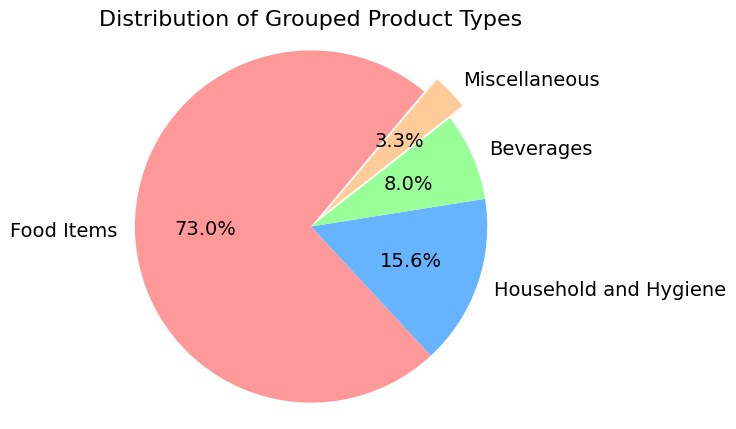

In [ ]:
# 'Grouped_Product_Type' Pie chart
grouped_counts= {
    'Food Items': 6398,
    'Household and Hygiene': 1368,
    'Beverages': 705,
    'Miscellaneous': 292
}

# Labels and sizes for the pie chart
labels= list(grouped_counts.keys())
sizes= list(grouped_counts.values())

# Colors for the pie chart
colors= ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Explode 'Miscellaneous' slice
explode= [0, 0, 0, 0.1]

# Plotting the pie chart
plt.figure(figsize= (5,5))
plt.pie(sizes, labels= labels, colors= colors, autopct= '%1.1f%%', startangle= 50, explode= explode, textprops= {'fontsize': 14})
plt.axis('equal')
plt.title('Distribution of Grouped Product Types', fontsize= 16)
plt.show()

In [ ]:
# Drop the 'Product_Type' column
df.drop(columns= ['Product_Type'], inplace= True)

# Verify changes
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Grouped_Product_Type
0,FD,12.66,Low Sugar,0.027,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,14,Food Items
1,FD,16.54,Low Sugar,0.144,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,24,Food Items
2,FD,14.28,Regular,0.031,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,36,Food Items
3,FD,12.10,Low Sugar,0.112,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,36,Food Items
4,NC,9.57,No Sugar,0.010,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,25,Household and Hygiene


In [ ]:
# Define numeric columns
num_cols= df.select_dtypes(include= np.number).columns.to_list()
num_cols

['Product_Weight',
 'Product_Allocated_Area',
 'Product_MRP',
 'Product_Store_Sales_Total',
 'Store_Age']

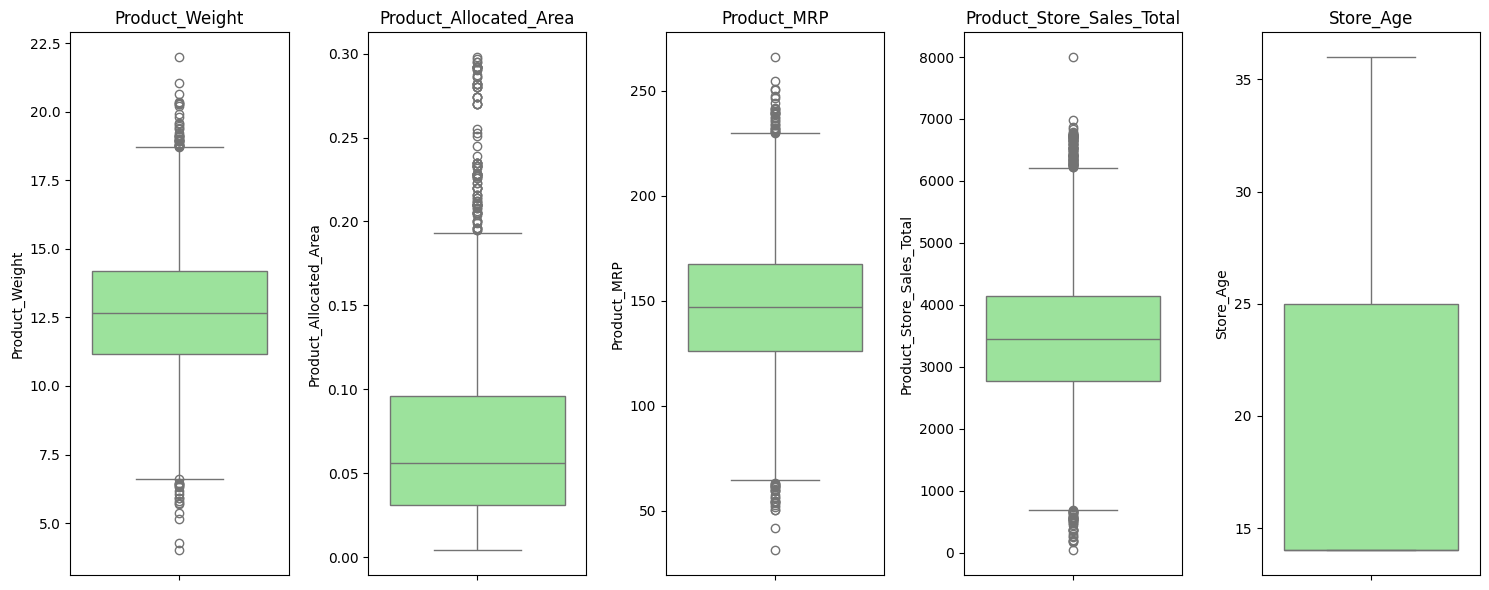

In [ ]:
# Plot numeric columns to visualize outliers
fig, ax= plt.subplots(1, len(num_cols), figsize= (15,6))

# Define color
color= 'lightgreen'

for j, col in enumerate(num_cols):
  sns.boxplot(df[col], ax= ax[j], color= color).set(title= col)

plt.tight_layout()
plt.show()

## **Outliers Analysis**

After reviewing the boxplots for the numeric features, I observed outliers in `Product_Weight`, `Product_Allocated_Area`, and `Product_MRP`. I have decided not to remove or transform these outliers because:

1. **Product_Weight**: The variation in product weights is natural and expected.
2. **Product_Allocated_Area**: Differences in display areas are normal due to diverse store layouts.
3. **Product_MRP**: Price variations are common and reflect the diversity in product pricing.

For `Store_Age`, which represents store age, and the target feature `Product_Store_Sales_Total`, no adjustments are needed.

These outliers are normal and represent real-world scenarios, so I will retain them to maintain the integrity of the data.


In [ ]:
# Features to be one-hot encoded for the model
categorical_features= df.select_dtypes(include= ['object', 'category']).columns.to_list()

# New dataframe with one-hot encoded features
df_ohe= pd.get_dummies(df, columns= categorical_features, drop_first= True)

# Identify the boolean columns
bool_cols= df_ohe.columns[df_ohe.dtypes == 'bool']

# Convert boolean values to 1s and 0s
df_ohe[bool_cols]= df_ohe[bool_cols].astype(int)

# View new dataframe
df_ohe.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,...,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Grouped_Product_Type_Food Items,Grouped_Product_Type_Household and Hygiene,Grouped_Product_Type_Miscellaneous
0,12.66,0.027,117.08,2842.40,14,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,16.54,0.144,171.43,4830.02,24,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,14.28,0.031,162.08,4130.16,36,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,12.10,0.112,186.31,4132.18,36,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,9.57,0.010,123.67,2279.36,25,0,1,1,0,1,...,0,1,0,1,1,0,0,0,1,0


In [ ]:
# Define the features for the model
X= df_ohe.drop('Product_Store_Sales_Total', axis= 1)
y= df_ohe['Product_Store_Sales_Total']

# Print shapes
print(X.shape)
print(y.shape)

(8763, 21)
(8763,)


In [ ]:
# Add a constant to the features
X= sm.add_constant(X)

# View X
X.head()

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,...,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Grouped_Product_Type_Food Items,Grouped_Product_Type_Household and Hygiene,Grouped_Product_Type_Miscellaneous
0,1.0,12.66,0.027,117.08,14,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,1.0,16.54,0.144,171.43,24,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1.0,14.28,0.031,162.08,36,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,1.0,12.10,0.112,186.31,36,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1.0,9.57,0.010,123.67,25,0,1,1,0,1,...,0,1,0,1,1,0,0,0,1,0


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

# View shapes
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (6572, 22)
X_test:  (2191, 22)
y_test:  (2191,)


In [ ]:
# Check for multicollinearity using VIF
df_vif= pd.DataFrame()
df_vif['Features']= X_train.columns
df_vif['VIF']= [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
df_vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Features,VIF
0,const,0.000000
1,Product_Weight,1.770003
2,Product_Allocated_Area,1.001169
3,Product_MRP,1.902640
4,Store_Age,inf
5,Product_Id_FD,inf
6,Product_Id_NC,inf
7,Product_Sugar_Content_No Sugar,inf
8,Product_Sugar_Content_Regular,1.082787
9,Store_Id_OUT002,inf


In [ ]:
# Drop 'Store_Age' from X
X_train.drop(columns= ['Store_Age'], axis= 1, inplace= True)
X_test.drop(columns= ['Store_Age'], axis= 1, inplace= True)

In [ ]:
# Linear Regression Model
model= sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2740.
Date:                       Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                               22:42:59   Log-Likelihood:                -49464.
No. Observations:                       6572   AIC:                         9.895e+04
Df Residuals:                           6560   BIC:                         9.903e+04
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -23.9153     32.825     -0.729      0.466     -88.263      40.432
Product_Weight                               140.9205      3.348     42.093      0.000     134.358     147.483
Product_Allocated_Area                       -54.5725    115.212     -0.474      0.636    -280.426     171.281
Product_MRP                                   12.8243      0.250     51.361      0.000      12.335      13.314
Product_Id_FD                                 39.5502     31.680      1.248      0.212     -22.553     101.654
Product_Id_NC                                 -2.7434     18.285     -0.150      0.881     -38.587      33.101
Product_Sugar_Content_No Sugar                -2.7434     18.285     -0.150      0.881     -38.587      33.101
Product_Sugar_Content_Regular                 33.1315     13.060      2.537      0.011       7.530      58.733
Store_Id_OUT002                             -254.7471      4.809    -52.968      0.000    -264.175    -245.319
Store_Id_OUT003                              326.7230     19.211     17.007      0.000     289.064     364.382
Store_Id_OUT004                             -165.2497      5.039    -32.795      0.000    -175.127    -155.372
Store_Size_Medium                            161.4733     16.018     10.081      0.000     130.073     192.873
Store_Size_Small                            -254.7471      4.809    -52.968      0.000    -264.175    -245.319
Store_Location_City_Type_Tier 2              -95.8912     12.880     -7.445      0.000    -121.140     -70.642
Store_Location_City_Type_Tier 3             -254.7471      4.809    -52.968      0.000    -264.175    -245.319
Store_Type_Food Mart                        -254.7471      4.809    -52.968      0.000    -264.175    -245.319
Store_Type_Supermarket Type1                  69.3586     15.923      4.356      0.000      38.144     100.574
Store_Type_Supermarket Type2                -165.2497      5.039    -32.795      0.000    -175.127    -155.372
Grouped_Product_Type_Food Items              -29.7327     29.984     -0.992      0.321     -88.511      29.045
Grouped_Product_Type_Household and Hygiene    59.6640     36.202      1.648      0.099     -11.303     130.631
Grouped_Product_Type_Miscellaneous             6.8756     25.444      0.270      0.787     -43.004      56.755
==============================================================================
Omnibus:                     2000.443   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53603.388
Skew:                           0.872   Prob(JB):                         0.00
Kurtosis:                 

### **Linear Regression Model Analysis**

The linear regression model demonstrates strong performance, with an R-squared value of 0.821. This indicates that approximately 82.1% of the variability in `Product_Store_Sales_Total` can be explained by the features in the model. The high F-statistic (2740.0) and the corresponding p-value (0.00) suggest that the model is statistically significant.


In [ ]:
# Model evaluation
def model_evaluation(model, X, y):
  y_hat= model.predict(X)

  rmse= np.sqrt(mean_squared_error(y, y_hat))
  mae= mean_absolute_error(y, y_hat)
  mape= mean_absolute_percentage_error(y, y_hat)
  r2= r2_score(y, y_hat)

  return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2]})

# View model evaluation
print('Training set evaluation:')
model_evaluation(model, X_train, y_train)

Training set evaluation:


,RMSE,MAE,MAPE,R2
0,449.240845,259.782916,0.099738,0.821278


In [ ]:
# Apply on the test data
print('Test set evaluation:')
model_evaluation(model, X_test, y_test)

Test set evaluation:


,RMSE,MAE,MAPE,R2
0,438.656765,260.295786,0.097778,0.833261


## **Model Evaluation Analysis**

### Training Set Evaluation
- **RMSE**: 449.24
- **MAE**: 259.78
- **MAPE**: 9.97%
- **R²**: 0.821

### Test Set Evaluation
- **RMSE**: 438.66
- **MAE**: 260.30
- **MAPE**: 9.78%
- **R²**: 0.833

### Key Insights

1. **Model Performance**:
   - The model demonstrates strong performance on both the training and test sets. An R² value of 0.821 on the training set and 0.833 on the test set indicates that the model explains approximately 82.1% and 83.3% of the variance in `Product_Store_Sales_Total`, respectively. This high R² value suggests that the model captures the relationship between the features and the target variable well.

2. **Error Metrics**:
   - **RMSE and MAE**: The Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) are both relatively low and similar across the training and test sets. RMSE values of 449.24 (training) and 438.66 (test) indicate that the average magnitude of prediction errors is consistent between training and testing. Similarly, the MAE values are very close, at 259.78 (training) and 260.30 (test).
   - **MAPE**: The Mean Absolute Percentage Error (MAPE) is also low, at around 9.97% for the training set and 9.78% for the test set. This indicates that the model's predictions are, on average, within 10% of the actual values.

3. **Model Generalization**:
   - The slight differences between the training and test set metrics suggest that the model generalizes well to unseen data. The consistency in RMSE, MAE, and MAPE across both sets indicates that the model is not overfitting and maintains its predictive power on new data.

4. **Implications**:
   - **Business Impact**: The low error rates and high R² values mean that the linear regression model can be reliably used for predicting `Product_Store_Sales_Total`. This allows for better forecasting and decision-making in sales strategies, inventory management, and other business operations.
   - **Model Stability**: The consistent performance metrics between training and test sets highlight the stability of the model, making it a robust tool for future predictions.

The linear regression model performs well, with high explanatory power and low prediction errors. This makes it a valuable tool for forecasting sales and supporting data-driven business decisions.


In [ ]:
# Mean of residuals test
np.mean(model.resid)

-1.387380749271753e-11

### **Mean of Residuals**

The mean of the residuals from the linear regression model is extremely close to zero, which indicates that the residuals are, on average, centered around zero. This is expected in a well-fitted linear regression model, as the regression line is positioned to minimize the sum of squared residuals, resulting in positive and negative residuals that approximately cancel each other out. This supports the assumption that the model does not have a systematic bias in its predictions.


Text(0.5, 1.0, 'Fitted Value vs. Residuals')

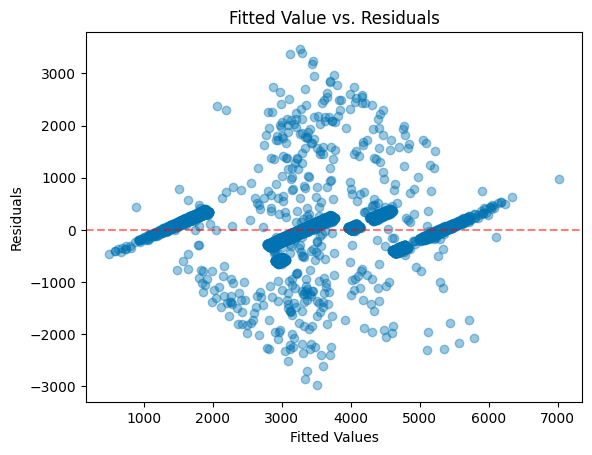

In [ ]:
# Homeoscedasticity test
plt.scatter(model.fittedvalues, model.resid, alpha= 0.4)
plt.axhline(color= 'r', alpha= 0.5, linestyle= '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Value vs. Residuals')

In [ ]:
# Goldfeld-Quandt test
result= sms.het_goldfeldquandt(y_train, X_train)
result

(0.9690883354147011, 0.8154699466857255, 'increasing')

### **Goldfeld-Quandt Test Results**

The Goldfeld-Quandt test was conducted to check for heteroscedasticity in the residuals of the linear regression model.

#### Results:
- **Test Statistic (F-value)**: 0.969
- **p-value**: 0.815
- **Alternative Hypothesis**: 'increasing'

#### Key Insights:
- **p-value**: The high p-value (0.815) indicates that we fail to reject the null hypothesis of homoscedasticity. This suggests that there is no significant evidence of heteroscedasticity in the residuals.
- **Conclusion**: Based on the Goldfeld-Quandt test, the residuals of the linear regression model appear to have constant variance, which supports the assumption of homoscedasticity.

Despite the visual evidence of heteroscedasticity from the scatter plot, the Goldfeld-Quandt test suggests that the issue is not be significant.

<Axes: ylabel='Count'>

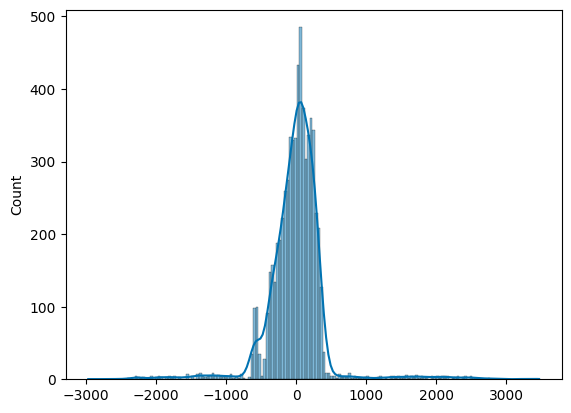

In [ ]:
# Normality of errors
sns.histplot(model.resid, kde= True)

((array([-3.70555497, -3.47440257, -3.3472089 , ...,  3.3472089 ,
          3.47440257,  3.70555497]),
  array([-2971.32353787, -2857.51020504, -2708.48570962, ...,
          3363.81552089,  3396.72403633,  3470.2469837 ])),
 (390.9618009728954, -1.3887646426098128e-11, 0.8698178154118662))

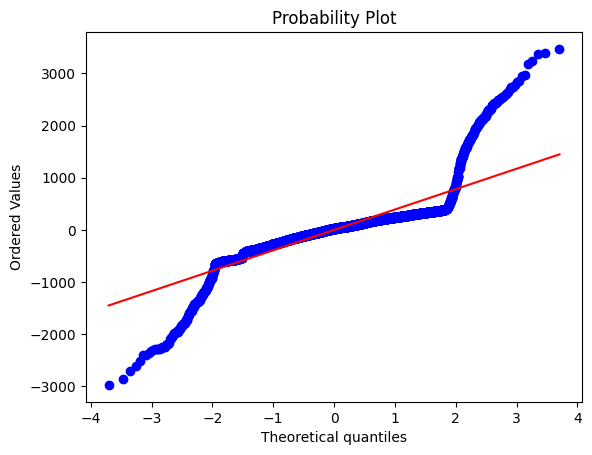

In [ ]:
# Q-Q Plot
stats.probplot(model.resid, dist= 'norm', plot= pylab)

## **Recap**

In this analysis, I performed the following steps:

1. **Exploratory Data Analysis (EDA)**:
   - Analyzed distributions and relationships between features using boxplots, histograms, and count plots.
   - Grouped similar product types into broader categories for simplicity.

2. **Data Preprocessing**:
   - One-hot encoded categorical features to prepare them for the linear regression model.
   - Identified and handled outliers by visual inspection and justification.
   - Checked for multicollinearity using Variance Inflation Factor (VIF) and removed highly collinear features.

3. **Model Building**:
   - Built a linear regression model using the Ordinary Least Squares (OLS) method.
   - Evaluated the model using metrics like RMSE, MAE, MAPE, and R-squared.
   - Performed diagnostic tests for model assumptions, including residual analysis, homoscedasticity, and normality of residuals.

## Conclusion

The linear regression model achieved an adjusted R-squared value of 0.821 on the training set and 0.833 on the test set, indicating a good fit for predicting product store sales total based on the selected features. An R-squared value of over 80% is considered very good in regression analysis, suggesting that the model explains a significant portion of the variance in sales data.

## **Insights and Recommendations**

### Store and City Type Analysis
1. **Store Type**:
   - **Supermarket Type 2**: This store type contributes significantly to sales, as indicated by the high positive coefficient in the model. Recommendation: Focus marketing and inventory efforts on these stores to maximize sales.
   - **Departmental Store** and **Food Mart**: These stores have lower sales contributions. Recommendation: Investigate these stores for potential issues such as location, product assortment, or customer preferences. Consider strategies to boost their performance or reallocate resources.

2. **City Type**:
   - **Tier 2 Cities**: These cities show a lower sales performance. Recommendation: Enhance promotional activities and tailor product offerings to better meet the needs and preferences of customers in these cities.
   - **Tier 1 and Tier 3 Cities**: These cities show a moderate performance. Recommendation: Maintain current strategies while exploring opportunities for further growth.

### Product Sales Performance
1. **Grouped Product Type**:
   - **Food Items**: These are the major contributors to sales. Recommendation: Ensure a diverse and well-stocked inventory of food items to maintain high sales levels.
   - **Household and Hygiene Products**: These have a moderate contribution. Recommendation: Expand the range and improve visibility and promotions for these products to boost sales.
   - **Beverages and Miscellaneous**: These categories have lower sales contributions. Recommendation: Evaluate product lines in these categories and optimize based on customer demand and preferences.

2. **Product MRP and Weight**:
   - **Product MRP**: Higher MRP products tend to have a positive impact on sales. Recommendation: Position higher MRP products strategically and promote them effectively.
   - **Product Weight**: Heavier products are associated with higher sales. Recommendation: Consider customer preferences for bulk or larger-sized products and adjust inventory accordingly.

## Final Recommendations

1. **Marketing and Promotions**: Tailor marketing strategies to focus on high-performing stores and cities. Implement targeted promotions in lower-performing areas to boost sales.

2. **Inventory Management**: Optimize inventory based on product performance insights. Ensure key products are well-stocked and consider expanding successful product lines.

3. **Continuous Monitoring**: Regularly update the model with new data to maintain its accuracy and relevance. Use model insights for strategic decision-making and to adapt to changing market conditions.

By implementing these recommendations, stakeholders can enhance their predictive analytics capabilities, leading to more informed decision-making and improved business outcomes.
